The following notebook contains all the code necessary to produce the panels presented in __Figure S2 and Figure S5 of Beadling et al., 2024: From the surface to the stratosphere: large-scale atmospheric response to Antarctic meltwater__. To run the code locally, one will need to download the model fields from the associated Zenodo archive and the ESM4 / CM4 CMIP6 preindustrial control output provided through the Earth System Grid Federation (ESGF) (Guo et al., 2018; Krasting et al., 2018):

> Guo, H., and Coauthors, 2018: NOAA-GFDL GFDL-CM4 model output piControl. Earth System Grid Federation. [Dataset] https://doi.org/10.22033/ESGF/CMIP6.8666.

> Krasting, J. P., and Coauthors, 2018a: NOAA-GFDL GFDL-ESM4 model output prepared for CMIP6 CMIP piControl. Earth System Grid Federation. [Dataset] https://doi.org/10.22033/ESGF/CMIP6.8669.

Please contact rebecca.beadling@temple.edu for questions related to the analysis and use of the datasets provided.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import momlevel as ml

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 12,6   #default figure size

### Load datasets needed for assessment. The piControl field is sliced to only load the corresponding years that overlap with the experiments.

In [45]:
cm4_ant1_sh = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant2_sh = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_290/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant3_sh = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_332/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant4_sh = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_369/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant5_sh = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_424/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_piC_sh = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0251-01-16','0494-12-16'))


cm4_ant1_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant2_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_290/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant3_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_332/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant4_swup_toa= xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_369/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant5_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_424/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_piC_swup_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swup_toa.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0251-01-16','0494-12-16'))

cm4_ant1_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant2_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_290/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant3_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_332/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant4_swdn_toa= xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_369/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant5_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_424/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_piC_swdn_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swdn_toa.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0251-01-16','0494-12-16'))

In [5]:
esm4_ant1_sh = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_sh = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_sh = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_sh = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_sh = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                use_cftime=True, combine = 'by_coords')
esm4_piC_sh = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.shflx.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))


esm4_ant1_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_swup_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))


esm4_ant1_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_swdn_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swdn_toa.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

### Compute planetary albedo

In [14]:
esm4_ant1_plan_alb = esm4_ant1_swup_toa.swup_toa/esm4_ant1_swdn_toa.swdn_toa
esm4_ant2_plan_alb = esm4_ant2_swup_toa.swup_toa/esm4_ant2_swdn_toa.swdn_toa
esm4_ant3_plan_alb = esm4_ant3_swup_toa.swup_toa/esm4_ant3_swdn_toa.swdn_toa
esm4_ant4_plan_alb = esm4_ant4_swup_toa.swup_toa/esm4_ant4_swdn_toa.swdn_toa
esm4_ant5_plan_alb = esm4_ant5_swup_toa.swup_toa/esm4_ant5_swdn_toa.swdn_toa
esm4_piC_plan_alb = esm4_piC_swup_toa.swup_toa/esm4_piC_swdn_toa.swdn_toa

In [46]:
cm4_ant1_plan_alb = cm4_ant1_swup_toa.swup_toa/cm4_ant1_swdn_toa.swdn_toa
cm4_ant2_plan_alb = cm4_ant2_swup_toa.swup_toa/cm4_ant2_swdn_toa.swdn_toa
cm4_ant3_plan_alb = cm4_ant3_swup_toa.swup_toa/cm4_ant3_swdn_toa.swdn_toa
cm4_ant4_plan_alb = cm4_ant4_swup_toa.swup_toa/cm4_ant4_swdn_toa.swdn_toa
cm4_ant5_plan_alb = cm4_ant5_swup_toa.swup_toa/cm4_ant5_swdn_toa.swdn_toa
cm4_piC_plan_alb = cm4_piC_swup_toa.swup_toa/cm4_piC_swdn_toa.swdn_toa

### Create ensemble means

In [25]:
esm4_ant1_sh_last20 = esm4_ant1_sh.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_sh_last20 = esm4_ant2_sh.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_sh_last20 = esm4_ant3_sh.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_sh_last20 = esm4_ant4_sh.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_sh_last20 = esm4_ant5_sh.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_sh_ave = esm4_piC_sh.mean(dim='time').load()

esm4_ant1_plan_alb_last20 = esm4_ant1_plan_alb.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_plan_alb_last20 = esm4_ant2_plan_alb.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_plan_alb_last20 = esm4_ant3_plan_alb.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_plan_alb_last20 = esm4_ant4_plan_alb.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_plan_alb_last20 = esm4_ant5_plan_alb.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_plan_alb_ave = esm4_piC_plan_alb.mean(dim='time').load()

/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [47]:
cm4_ant1_sh_last20 = cm4_ant1_sh.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant2_sh_last20 = cm4_ant2_sh.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant3_sh_last20 = cm4_ant3_sh.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant4_sh_last20 = cm4_ant4_sh.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant5_sh_last20 = cm4_ant5_sh.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_piC_sh_ave = cm4_piC_sh.mean(dim='time').load()

cm4_ant1_plan_alb_last20 = cm4_ant1_plan_alb.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant2_plan_alb_last20 = cm4_ant2_plan_alb.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant3_plan_alb_last20 = cm4_ant3_plan_alb.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant4_plan_alb_last20 = cm4_ant4_plan_alb.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant5_plan_alb_last20 = cm4_ant5_plan_alb.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_piC_plan_alb_ave = cm4_piC_plan_alb.mean(dim='time').load()

/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [8]:
esm4_ant_sh_ens = xr.concat([esm4_ant1_sh_last20,
                         esm4_ant2_sh_last20,
                         esm4_ant3_sh_last20,
                         esm4_ant4_sh_last20,
                         esm4_ant5_sh_last20],dim='member')
esm4_ant_sh_ens_ave = esm4_ant_sh_ens.mean(dim='member')

cm4_ant_sh_ens = xr.concat([cm4_ant1_sh_last20,
                         cm4_ant2_sh_last20,
                         cm4_ant3_sh_last20,
                         cm4_ant4_sh_last20,
                         cm4_ant5_sh_last20],dim='member')
cm4_ant_sh_ens_ave = cm4_ant_sh_ens.mean(dim='member')

In [48]:
esm4_ant_plan_alb_ens = xr.concat([esm4_ant1_plan_alb_last20,
                         esm4_ant2_plan_alb_last20,
                         esm4_ant3_plan_alb_last20,
                         esm4_ant4_plan_alb_last20,
                         esm4_ant5_plan_alb_last20],dim='member')
esm4_ant_plan_alb_ens_ave = esm4_ant_plan_alb_ens.mean(dim='member')

cm4_ant_plan_alb_ens = xr.concat([cm4_ant1_plan_alb_last20,
                         cm4_ant2_plan_alb_last20,
                         cm4_ant3_plan_alb_last20,
                         cm4_ant4_plan_alb_last20,
                         cm4_ant5_plan_alb_last20],dim='member')
cm4_ant_plan_alb_ens_ave = cm4_ant_plan_alb_ens.mean(dim='member')

### Compute anomalies

In [9]:
esm4_ant1_sh_diff = esm4_ant1_sh_last20 - esm4_piC_sh_ave
esm4_ant2_sh_diff = esm4_ant2_sh_last20 - esm4_piC_sh_ave
esm4_ant3_sh_diff = esm4_ant3_sh_last20 - esm4_piC_sh_ave 
esm4_ant4_sh_diff = esm4_ant4_sh_last20 - esm4_piC_sh_ave 
esm4_ant5_sh_diff = esm4_ant5_sh_last20 - esm4_piC_sh_ave 
esm4_ens_sh_diff = esm4_ant_sh_ens_ave - esm4_piC_sh_ave 

In [29]:
esm4_ant1_plan_alb_diff = esm4_ant1_plan_alb_last20 - esm4_piC_plan_alb_ave
esm4_ant2_plan_alb_diff = esm4_ant2_plan_alb_last20 - esm4_piC_plan_alb_ave
esm4_ant3_plan_alb_diff = esm4_ant3_plan_alb_last20 - esm4_piC_plan_alb_ave 
esm4_ant4_plan_alb_diff = esm4_ant4_plan_alb_last20 - esm4_piC_plan_alb_ave 
esm4_ant5_plan_alb_diff = esm4_ant5_plan_alb_last20 - esm4_piC_plan_alb_ave 
esm4_ens_plan_alb_diff = esm4_ant_plan_alb_ens_ave - esm4_piC_plan_alb_ave 

In [10]:
cm4_ant1_sh_diff = cm4_ant1_sh_last20 - cm4_piC_sh_ave
cm4_ant2_sh_diff = cm4_ant2_sh_last20 - cm4_piC_sh_ave
cm4_ant3_sh_diff = cm4_ant3_sh_last20 - cm4_piC_sh_ave 
cm4_ant4_sh_diff = cm4_ant4_sh_last20 - cm4_piC_sh_ave 
cm4_ant5_sh_diff = cm4_ant5_sh_last20 - cm4_piC_sh_ave 
cm4_ens_sh_diff = cm4_ant_sh_ens_ave - cm4_piC_sh_ave 

In [49]:
cm4_ant1_plan_alb_diff = cm4_ant1_plan_alb_last20 - cm4_piC_plan_alb_ave
cm4_ant2_plan_alb_diff = cm4_ant2_plan_alb_last20 - cm4_piC_plan_alb_ave
cm4_ant3_plan_alb_diff = cm4_ant3_plan_alb_last20 - cm4_piC_plan_alb_ave 
cm4_ant4_plan_alb_diff = cm4_ant4_plan_alb_last20 - cm4_piC_plan_alb_ave 
cm4_ant5_plan_alb_diff = cm4_ant5_plan_alb_last20 - cm4_piC_plan_alb_ave 
cm4_ens_plan_alb_diff = cm4_ant_plan_alb_ens_ave - cm4_piC_plan_alb_ave 

### Statistical significance

In [50]:
%%time
cm4_piC_sh_ann = ml.util.annual_average(cm4_piC_sh, tcoord='time')
cm4_piC_sh_ann_20 = cm4_piC_sh_ann.rolling(time=20, center=True).mean()
cm4_piC_sh_ann_20_std = cm4_piC_sh_ann_20.std(dim='time')

cm4_piC_plan_alb_ann = ml.util.annual_average(cm4_piC_plan_alb, tcoord='time')
cm4_piC_plan_alb_ann_20 = cm4_piC_plan_alb_ann.rolling(time=20, center=True).mean()
cm4_piC_plan_alb_ann_20_std = cm4_piC_plan_alb_ann_20.std(dim='time')

CPU times: user 15.4 s, sys: 150 ms, total: 15.5 s
Wall time: 15.5 s


In [28]:
esm4_piC_sh_ann = ml.util.annual_average(esm4_piC_sh, tcoord='time')
esm4_piC_sh_ann_20 = esm4_piC_sh_ann.rolling(time=20, center=True).mean()
esm4_piC_sh_ann_20_std = esm4_piC_sh_ann_20.std(dim='time')

esm4_piC_plan_alb_ann = ml.util.annual_average(esm4_piC_plan_alb, tcoord='time')
esm4_piC_plan_alb_ann_20 = esm4_piC_plan_alb_ann.rolling(time=20, center=True).mean()
esm4_piC_plan_alb_ann_20_std = esm4_piC_plan_alb_ann_20.std(dim='time')

In [15]:
cm4_abs_diff_sh_ant1 = abs(cm4_ant1_sh_diff)
cm4_abs_diff_sh_ant2 = abs(cm4_ant2_sh_diff)
cm4_abs_diff_sh_ant3 = abs(cm4_ant3_sh_diff)
cm4_abs_diff_sh_ant4 = abs(cm4_ant4_sh_diff)
cm4_abs_diff_sh_ant5 = abs(cm4_ant5_sh_diff)
cm4_abs_diff_sh_ens = abs(cm4_ens_sh_diff)

cm4_ant1_lt_1p64_std_sh = cm4_abs_diff_sh_ant1.where(cm4_abs_diff_sh_ant1<1.64*cm4_piC_sh_ann_20_std)
cm4_ant2_lt_1p64_std_sh = cm4_abs_diff_sh_ant2.where(cm4_abs_diff_sh_ant2<1.64*cm4_piC_sh_ann_20_std)
cm4_ant3_lt_1p64_std_sh = cm4_abs_diff_sh_ant3.where(cm4_abs_diff_sh_ant3<1.64*cm4_piC_sh_ann_20_std)
cm4_ant4_lt_1p64_std_sh = cm4_abs_diff_sh_ant4.where(cm4_abs_diff_sh_ant4<1.64*cm4_piC_sh_ann_20_std)
cm4_ant5_lt_1p64_std_sh = cm4_abs_diff_sh_ant5.where(cm4_abs_diff_sh_ant5<1.64*cm4_piC_sh_ann_20_std)
cm4_ens_lt_1p64_std_sh = cm4_abs_diff_sh_ens.where(cm4_abs_diff_sh_ens<1.64*cm4_piC_sh_ann_20_std)

In [51]:
cm4_abs_diff_plan_alb_ant1 = abs(cm4_ant1_plan_alb_diff)
cm4_abs_diff_plan_alb_ant2 = abs(cm4_ant2_plan_alb_diff)
cm4_abs_diff_plan_alb_ant3 = abs(cm4_ant3_plan_alb_diff)
cm4_abs_diff_plan_alb_ant4 = abs(cm4_ant4_plan_alb_diff)
cm4_abs_diff_plan_alb_ant5 = abs(cm4_ant5_plan_alb_diff)
cm4_abs_diff_plan_alb_ens = abs(cm4_ens_plan_alb_diff)

cm4_ant1_lt_1p64_std_plan_alb = cm4_abs_diff_plan_alb_ant1.where(cm4_abs_diff_plan_alb_ant1<1.64*cm4_piC_plan_alb_ann_20_std)
cm4_ant2_lt_1p64_std_plan_alb = cm4_abs_diff_plan_alb_ant2.where(cm4_abs_diff_plan_alb_ant2<1.64*cm4_piC_plan_alb_ann_20_std)
cm4_ant3_lt_1p64_std_plan_alb = cm4_abs_diff_plan_alb_ant3.where(cm4_abs_diff_plan_alb_ant3<1.64*cm4_piC_plan_alb_ann_20_std)
cm4_ant4_lt_1p64_std_plan_alb = cm4_abs_diff_plan_alb_ant4.where(cm4_abs_diff_plan_alb_ant4<1.64*cm4_piC_plan_alb_ann_20_std)
cm4_ant5_lt_1p64_std_plan_alb = cm4_abs_diff_plan_alb_ant5.where(cm4_abs_diff_plan_alb_ant5<1.64*cm4_piC_plan_alb_ann_20_std)
cm4_ens_lt_1p64_std_plan_alb = cm4_abs_diff_plan_alb_ens.where(cm4_abs_diff_plan_alb_ens<1.64*cm4_piC_plan_alb_ann_20_std)

In [2]:
esm4_abs_diff_sh_ant1 = abs(esm4_ant1_sh_diff)
esm4_abs_diff_sh_ant2 = abs(esm4_ant2_sh_diff)
esm4_abs_diff_sh_ant3 = abs(esm4_ant3_sh_diff)
esm4_abs_diff_sh_ant4 = abs(esm4_ant4_sh_diff)
esm4_abs_diff_sh_ant5 = abs(esm4_ant5_sh_diff)
esm4_abs_diff_sh_ens = abs(esm4_ens_sh_diff)

esm4_ant1_lt_1p64_std_sh = esm4_abs_diff_sh_ant1.where(esm4_abs_diff_sh_ant1<1.64*esm4_piC_sh_ann_20_std)
esm4_ant2_lt_1p64_std_sh = esm4_abs_diff_sh_ant2.where(esm4_abs_diff_sh_ant2<1.64*esm4_piC_sh_ann_20_std)
esm4_ant3_lt_1p64_std_sh = esm4_abs_diff_sh_ant3.where(esm4_abs_diff_sh_ant3<1.64*esm4_piC_sh_ann_20_std)
esm4_ant4_lt_1p64_std_sh = esm4_abs_diff_sh_ant4.where(esm4_abs_diff_sh_ant4<1.64*esm4_piC_sh_ann_20_std)
esm4_ant5_lt_1p64_std_sh = esm4_abs_diff_sh_ant5.where(esm4_abs_diff_sh_ant5<1.64*esm4_piC_sh_ann_20_std)
esm4_ens_lt_1p64_std_sh = esm4_abs_diff_sh_ens.where(esm4_abs_diff_sh_ens<1.64*esm4_piC_sh_ann_20_std)

In [31]:
esm4_abs_diff_plan_alb_ant1 = abs(esm4_ant1_plan_alb_diff)
esm4_abs_diff_plan_alb_ant2 = abs(esm4_ant2_plan_alb_diff)
esm4_abs_diff_plan_alb_ant3 = abs(esm4_ant3_plan_alb_diff)
esm4_abs_diff_plan_alb_ant4 = abs(esm4_ant4_plan_alb_diff)
esm4_abs_diff_plan_alb_ant5 = abs(esm4_ant5_plan_alb_diff)
esm4_abs_diff_plan_alb_ens = abs(esm4_ens_plan_alb_diff)

esm4_ant1_lt_1p64_std_plan_alb = esm4_abs_diff_plan_alb_ant1.where(esm4_abs_diff_plan_alb_ant1<1.64*esm4_piC_plan_alb_ann_20_std)
esm4_ant2_lt_1p64_std_plan_alb = esm4_abs_diff_plan_alb_ant2.where(esm4_abs_diff_plan_alb_ant2<1.64*esm4_piC_plan_alb_ann_20_std)
esm4_ant3_lt_1p64_std_plan_alb = esm4_abs_diff_plan_alb_ant3.where(esm4_abs_diff_plan_alb_ant3<1.64*esm4_piC_plan_alb_ann_20_std)
esm4_ant4_lt_1p64_std_plan_alb = esm4_abs_diff_plan_alb_ant4.where(esm4_abs_diff_plan_alb_ant4<1.64*esm4_piC_plan_alb_ann_20_std)
esm4_ant5_lt_1p64_std_plan_alb = esm4_abs_diff_plan_alb_ant5.where(esm4_abs_diff_plan_alb_ant5<1.64*esm4_piC_plan_alb_ann_20_std)
esm4_ens_lt_1p64_std_plan_alb = esm4_abs_diff_plan_alb_ens.where(esm4_abs_diff_plan_alb_ens<1.64*esm4_piC_plan_alb_ann_20_std)

### Functions to create maps

In [57]:
def plot_globalmap_sh_diff(array, arraystd, title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = array.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-12,vmax=12, levels=60, 
        cmap='RdBu_r',extend='both'
    )
    
    arraystd.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    ax.axes.coastlines()
    plt.title(title)

In [38]:
def plot_globalmap_plan_alb_diff(array, arraystd, title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = array.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=60, 
        cmap='RdBu_r',extend='both'
    )
    
    arraystd.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    ax.axes.coastlines()
    plt.title(title)

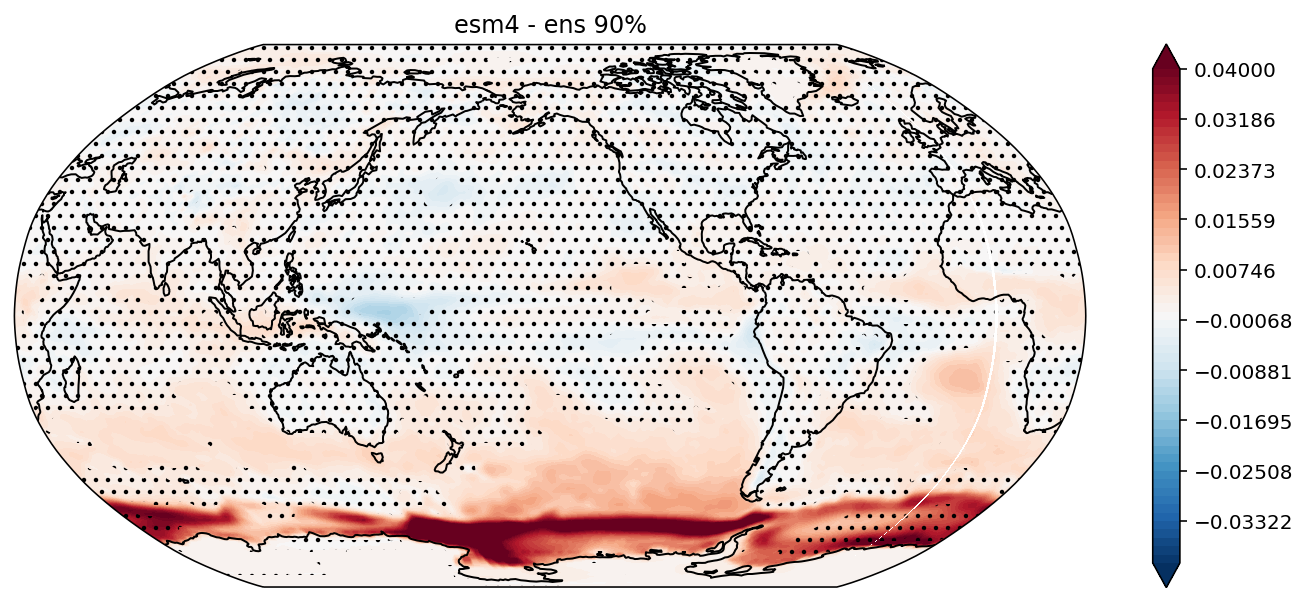

In [39]:
plot_globalmap_plan_alb_diff(esm4_ens_plan_alb_diff,
                        esm4_ens_lt_1p64_std_plan_alb,
                        'esm4 - ens 90%')

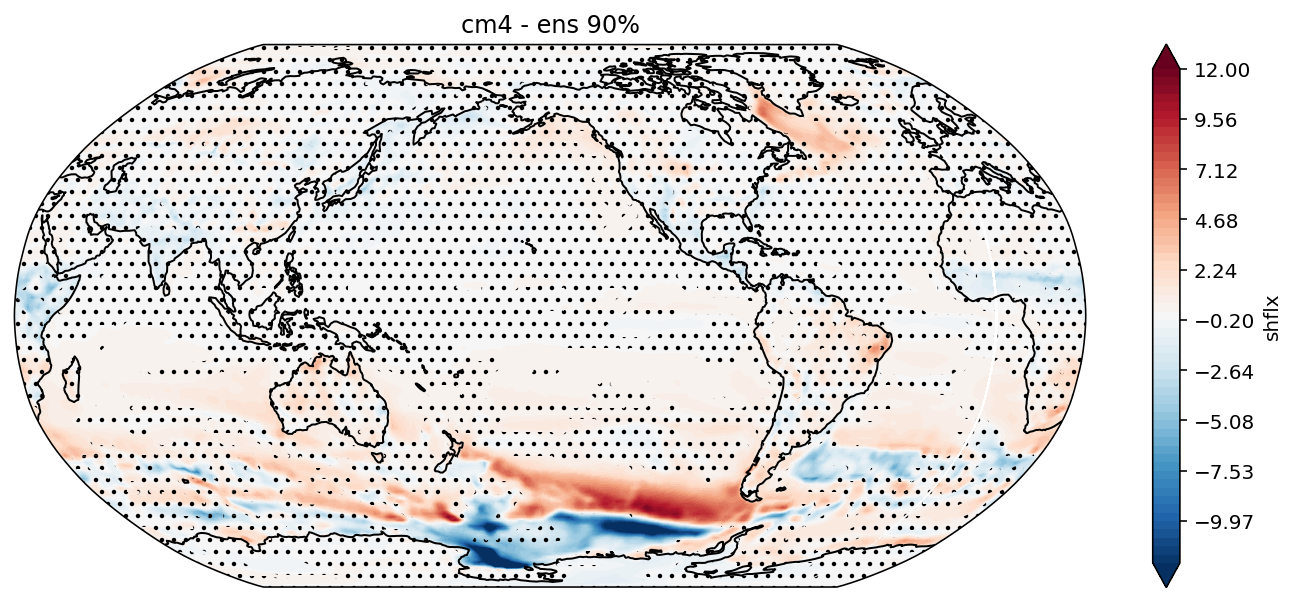

In [58]:
plot_globalmap_sh_diff(cm4_ens_sh_diff.shflx,
                        cm4_ens_lt_1p64_std_sh.shflx,
                        'cm4 - ens 90%')

plt.savefig('#_ens_sh_90_CI.pdf',dpi=600)

CPU times: user 4min 42s, sys: 11.7 s, total: 4min 54s
Wall time: 4min 13s


Text(0.5, 1.0, '')

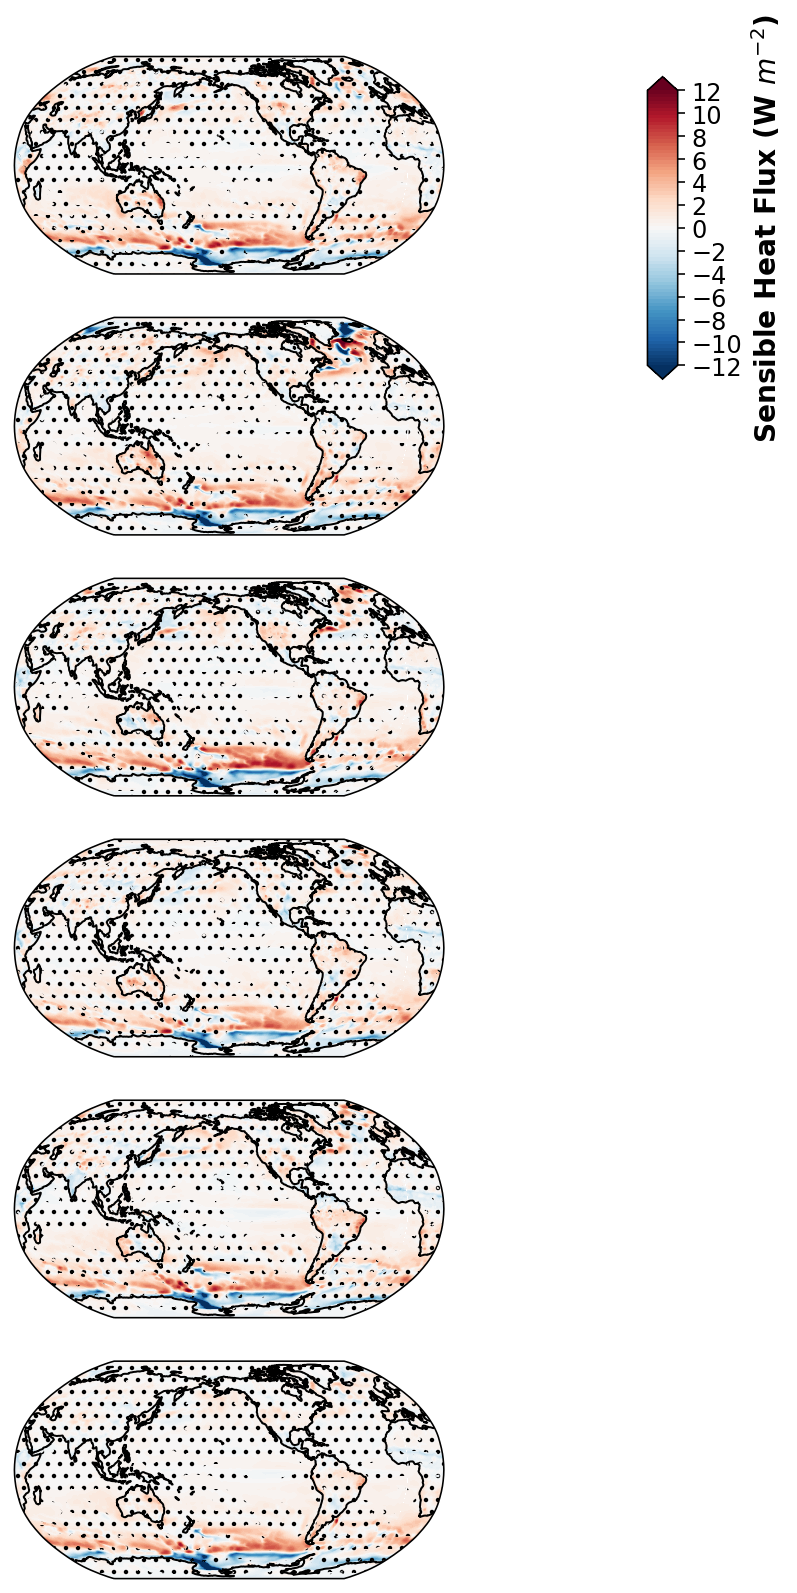

In [60]:
%%time
fig, (ax0,ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=1,
                                nrows=6,
                                figsize=(14,14),
                                subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})

#plot_globalmap_sh_diff(esm4_ant2_sh_diff.shflx,
#                        esm4_ant2_lt_1p64_std_sh.shflx,
#                        'esm4 - ant2 90%')
## add custom colorbars
cax_sh = fig.add_axes([0.72, 0.72, 0.015, 0.15])
cbar_sh = esm4_ant2_sh_diff.shflx.plot.contourf(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=-12,vmax=12, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
cbr_sh = plt.colorbar(cbar_sh, cax=cax_sh, ticks=[-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12], orientation="vertical")
cbr_sh.set_label(label='Sensible Heat Flux (W $m^{-2}$)', fontsize=14, weight='bold')
cbr_sh.ax.tick_params(labelsize='large')


#### esm4
## ant1 esm4
esm4_ant1_sh_diff.shflx.plot.contourf(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=-12,vmax=12, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ant1_lt_1p64_std_sh.shflx.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

## ant2 esm4
esm4_ant2_sh_diff.shflx.plot.contourf(ax=ax1,
        transform=ccrs.PlateCarree(),
        vmin=-12,vmax=12, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ant2_lt_1p64_std_sh.shflx.plot.contourf(ax=ax1, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

## ant3 esm4
esm4_ant3_sh_diff.shflx.plot.contourf(ax=ax2,
        transform=ccrs.PlateCarree(),
        vmin=-12,vmax=12, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ant3_lt_1p64_std_sh.shflx.plot.contourf(ax=ax2, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## ant4 esm4
esm4_ant4_sh_diff.shflx.plot.contourf(ax=ax3,
        transform=ccrs.PlateCarree(),
        vmin=-12,vmax=12, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ant4_lt_1p64_std_sh.shflx.plot.contourf(ax=ax3, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

## ant5 esm4
esm4_ant5_sh_diff.shflx.plot.contourf(ax=ax4,
        transform=ccrs.PlateCarree(),
        vmin=-12,vmax=12, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ant5_lt_1p64_std_sh.shflx.plot.contourf(ax=ax4, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## ens esm4
esm4_ens_sh_diff.shflx.plot.contourf(ax=ax5,
        transform=ccrs.PlateCarree(),
        vmin=-12,vmax=12, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ens_lt_1p64_std_sh.shflx.plot.contourf(ax=ax5, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())



ax0.axes.coastlines()
ax1.axes.coastlines()
ax2.axes.coastlines()
ax3.axes.coastlines()
ax4.axes.coastlines()
ax5.axes.coastlines()

ax0.set_title('')
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
ax5.set_title('')

/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


CPU times: user 1min 40s, sys: 12.8 s, total: 1min 53s
Wall time: 1min 35s


Text(0.5, 1.0, '')

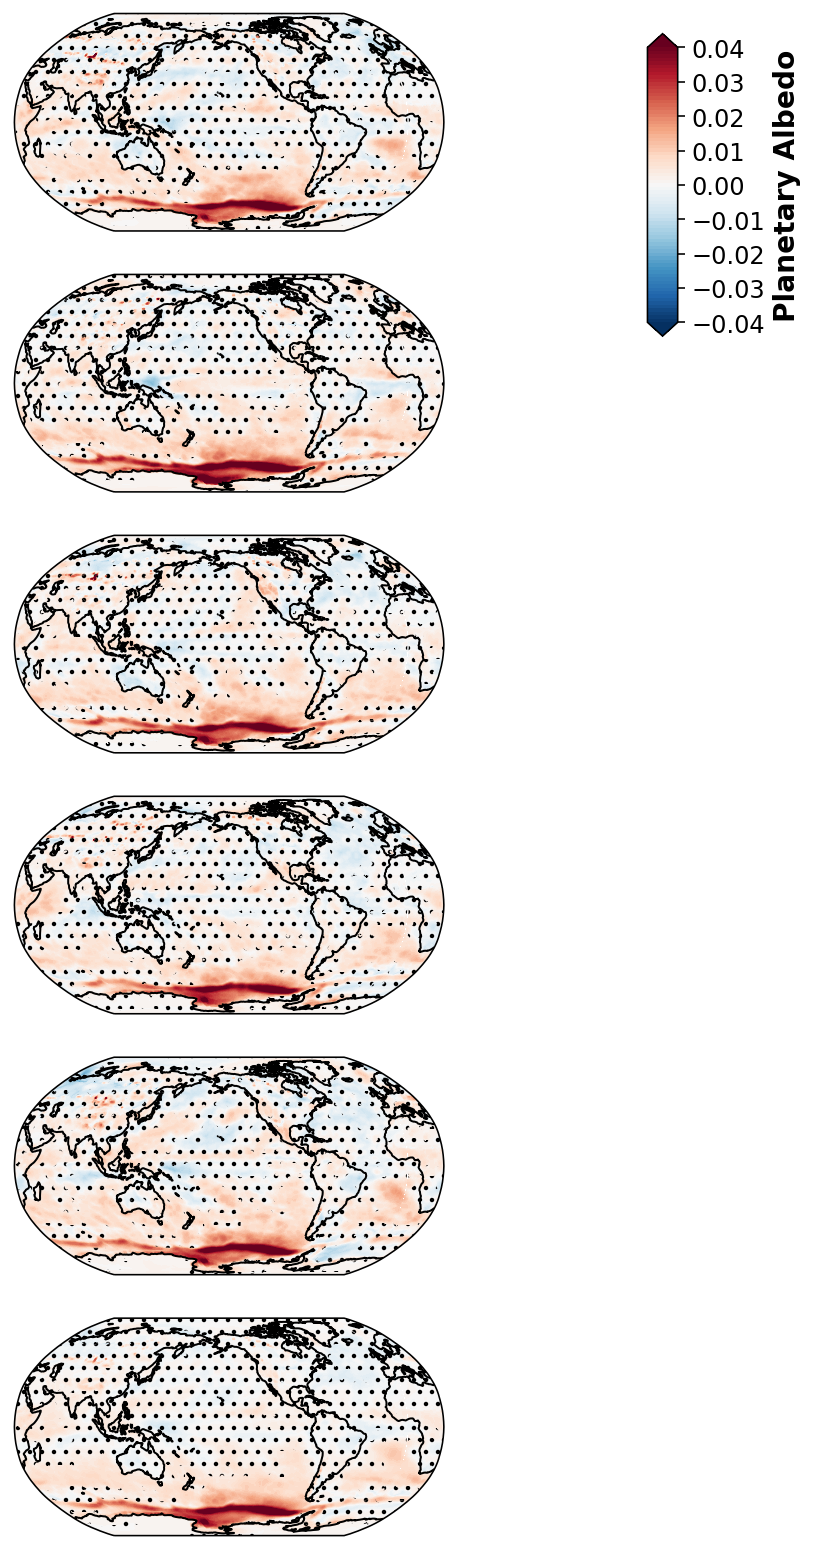

In [52]:
%%time
fig, (ax0,ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=1,
                                nrows=6,
                                figsize=(14,14),
                                subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})

#plot_globalmap_sh_diff(cm4_ant2_sh_diff.shflx,
#                        cm4_ant2_lt_1p64_std_sh.shflx,
#                        'cm4 - ant2 90%')
## add custom colorbars
cax_sh = fig.add_axes([0.72, 0.72, 0.015, 0.15])
cbar_sh = cm4_ant2_plan_alb_diff.plot.contourf(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
cbr_sh = plt.colorbar(cbar_sh, cax=cax_sh, ticks=[-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04], orientation="vertical")
cbr_sh.set_label(label='Planetary Albedo', fontsize=14, weight='bold')
cbr_sh.ax.tick_params(labelsize='large')

#### cm4
## ant1 cm4
cm4_ant1_plan_alb_diff.plot.contourf(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
cm4_ant1_lt_1p64_std_plan_alb.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

## ant2 cm4
cm4_ant2_plan_alb_diff.plot.contourf(ax=ax1,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
cm4_ant2_lt_1p64_std_plan_alb.plot.contourf(ax=ax1, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## ant3 cm4
cm4_ant3_plan_alb_diff.plot.contourf(ax=ax2,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
cm4_ant3_lt_1p64_std_plan_alb.plot.contourf(ax=ax2, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

## ant4 cm4
cm4_ant4_plan_alb_diff.plot.contourf(ax=ax3,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
cm4_ant4_lt_1p64_std_plan_alb.plot.contourf(ax=ax3, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## ant5 cm4
cm4_ant5_plan_alb_diff.plot.contourf(ax=ax4,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
cm4_ant5_lt_1p64_std_plan_alb.plot.contourf(ax=ax4, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## ens cm4
cm4_ens_plan_alb_diff.plot.contourf(ax=ax5,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
cm4_ens_lt_1p64_std_plan_alb.plot.contourf(ax=ax5, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

ax0.axes.coastlines()
ax1.axes.coastlines()
ax2.axes.coastlines()
ax3.axes.coastlines()
ax4.axes.coastlines()
ax5.axes.coastlines()

ax0.set_title('')
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
ax5.set_title('')

CPU times: user 1min 52s, sys: 14.4 s, total: 2min 6s
Wall time: 1min 44s


Text(0.5, 1.0, '')

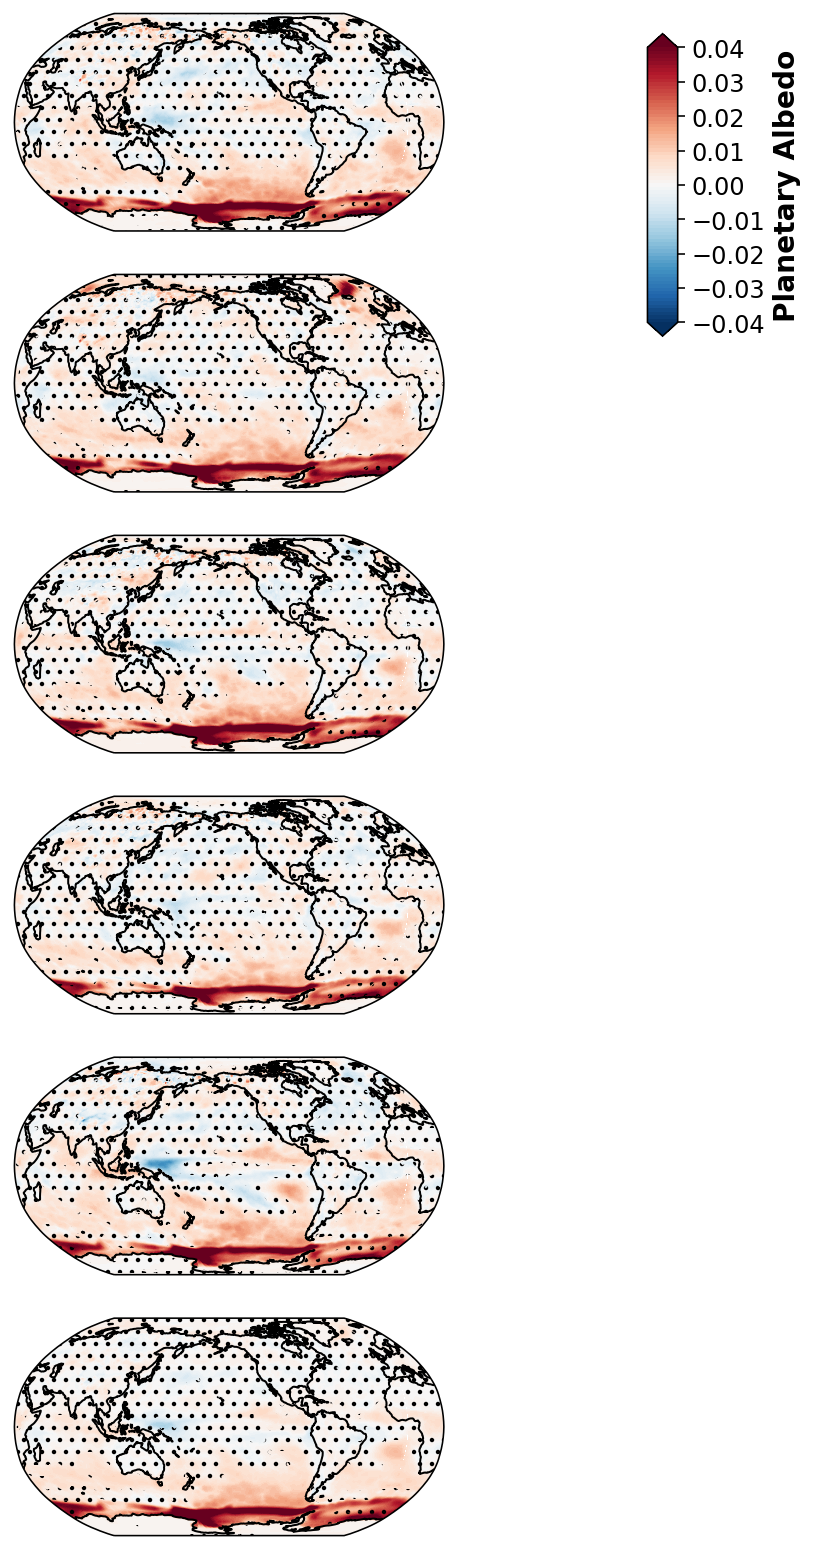

In [44]:
%%time
fig, (ax0,ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=1,
                                nrows=6,
                                figsize=(14,14),
                                subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})

#plot_globalmap_sh_diff(esm4_ant2_sh_diff.shflx,
#                        esm4_ant2_lt_1p64_std_sh.shflx,
#                        'esm4 - ant2 90%')
## add custom colorbars
cax_sh = fig.add_axes([0.72, 0.72, 0.015, 0.15])
cbar_sh = esm4_ant2_plan_alb_diff.plot.contourf(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
cbr_sh = plt.colorbar(cbar_sh, cax=cax_sh, ticks=[-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04], orientation="vertical")
cbr_sh.set_label(label='Planetary Albedo', fontsize=14, weight='bold')
cbr_sh.ax.tick_params(labelsize='large')

#### esm4
## ant1 esm4
esm4_ant1_plan_alb_diff.plot.contourf(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ant1_lt_1p64_std_plan_alb.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

## ant2 esm4
esm4_ant2_plan_alb_diff.plot.contourf(ax=ax1,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ant2_lt_1p64_std_plan_alb.plot.contourf(ax=ax1, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## ant3 esm4
esm4_ant3_plan_alb_diff.plot.contourf(ax=ax2,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ant3_lt_1p64_std_plan_alb.plot.contourf(ax=ax2, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

## ant4 esm4
esm4_ant4_plan_alb_diff.plot.contourf(ax=ax3,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ant4_lt_1p64_std_plan_alb.plot.contourf(ax=ax3, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## ant5 esm4
esm4_ant5_plan_alb_diff.plot.contourf(ax=ax4,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ant5_lt_1p64_std_plan_alb.plot.contourf(ax=ax4, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## ens esm4
esm4_ens_plan_alb_diff.plot.contourf(ax=ax5,
        transform=ccrs.PlateCarree(),
        vmin=-0.04,vmax=0.04, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
    
esm4_ens_lt_1p64_std_plan_alb.plot.contourf(ax=ax5, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

ax0.axes.coastlines()
ax1.axes.coastlines()
ax2.axes.coastlines()
ax3.axes.coastlines()
ax4.axes.coastlines()
ax5.axes.coastlines()

ax0.set_title('')
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
ax5.set_title('')